# Big Mart Sales Predication By using XGBRegressor

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Collection & Data Analysis

mart_data = pd.read_csv("big_mart_data.csv")

In [3]:
# To check first five records
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# To check last five records

mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# To check shape of data

mart_data.shape

(8523, 12)

In [6]:
# To check data type

mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# To check any missing values

mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# to Check Statistical Data

mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# handling Missing value with the melp of Mean &  mode

mart_data['Item_Weight'].mean()

12.857645184136183

In [10]:
# filling the missing values in "Item_weight column" with "Mean" value

mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(), inplace=True)

In [11]:
# Check Missing values
mart_data["Item_Weight"].isnull().sum()

0

In [12]:
# Replacing the missing values in "outlet_size" with mode but data in categorical formate

mode_of_Outlet_size = mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [13]:
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [14]:
missing_values = mart_data['Outlet_Size'].isnull()  

In [15]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [16]:
mart_data.loc[missing_values, 'Outlet_Size'] = mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [17]:
## Checking Missing Values

mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
# To check Statistical data 

mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
# Numerical feature

sns.set()   # All sns  graph plot with gird 

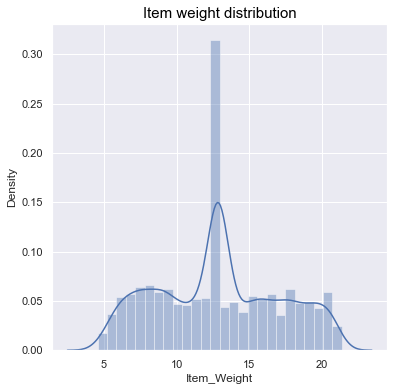

In [20]:
## Data Visulization:- Item weight distribution

plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_Weight"])
plt.title("Item weight distribution" , fontsize=15, color ='Black')
plt.show()

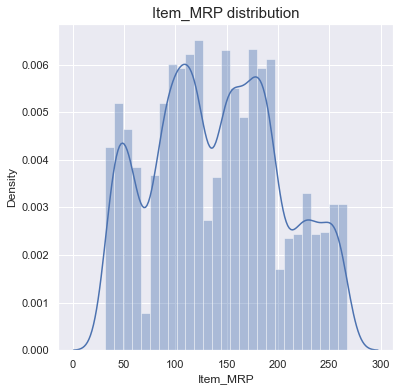

In [21]:
## Data Visulization:-Item_MRP distribution

plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_MRP"])
plt.title("Item_MRP distribution",fontsize=15)
plt.show()

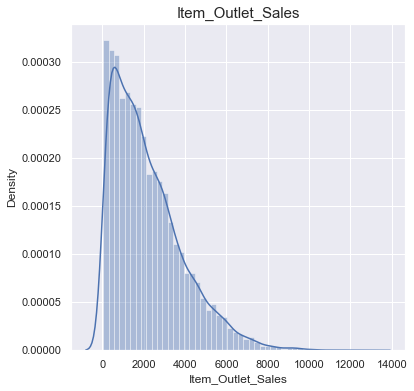

In [22]:
## Data Visulization:- Item_Outlet_Sales distribution

plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_Outlet_Sales"])
plt.title("Item_Outlet_Sales", fontsize=15)
plt.show()

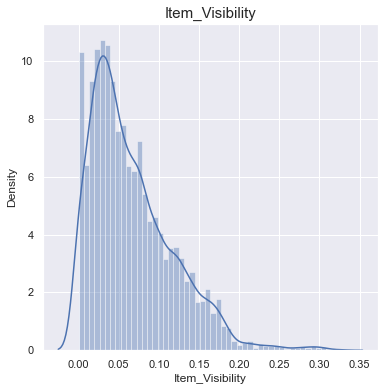

In [23]:
## Data Visulization:- Item_Visibility distribution

plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_Visibility"])
plt.title("Item_Visibility", fontsize=15)
plt.show()

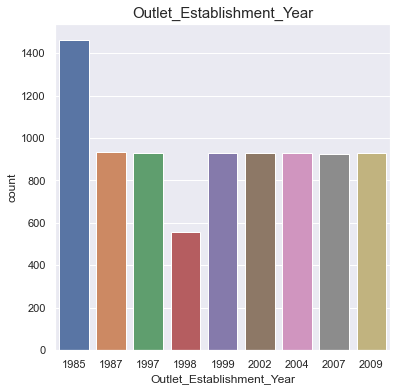

In [24]:
## Data Visulization:- Outlet_Establishment_Year

plt.figure(figsize=(6,6))
sns.countplot("Outlet_Establishment_Year" , data=mart_data)
plt.title("Outlet_Establishment_Year", fontsize=15)
plt.show()

In [25]:
## Graphs for Categorical features

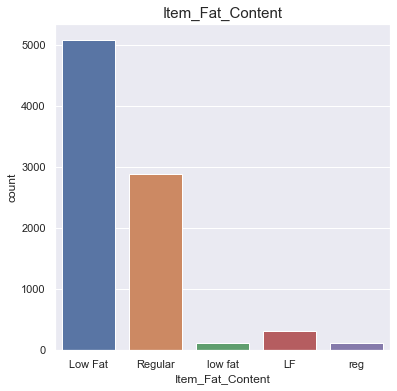

In [26]:
#  Data Visulization:- Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=mart_data)
plt.title("Item_Fat_Content", fontsize=15)
plt.show()

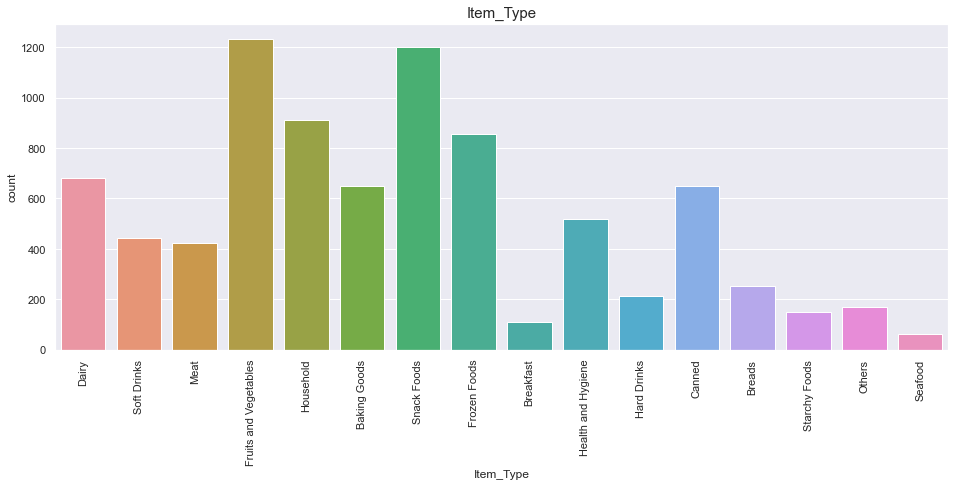

In [27]:
#  Data Visulization:- Item_Type
plt.figure(figsize=(16,6))
sns.countplot(x='Item_Type', data=mart_data)
plt.title("Item_Type", fontsize=15)
plt.xticks(rotation=90)
plt.show()

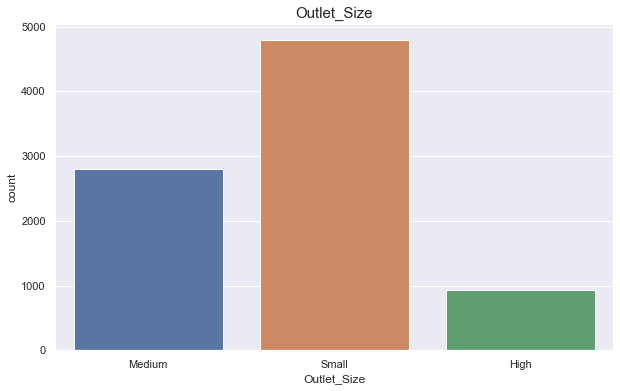

In [28]:
#  Data Visulization:- Outlet_size
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size', data=mart_data)
plt.title("Outlet_Size", fontsize=15)
plt.xticks(rotation=0)
plt.show()

# Data Preprocessing

In [29]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
mart_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
mart_data.replace({'Item_Fat_Content':{'LF': 'Low Fat', 'low fat':'Low Fat' , 'reg': "Regular"}}, inplace= True)

In [32]:
mart_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
# Label Encoding:- convert categorical data into numeric number

In [35]:
#  Load Required Libraries for encoding

from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()

In [37]:
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data["Item_Identifier"])

In [38]:
mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data["Item_Fat_Content"])

In [39]:
mart_data['Item_Type'] = encoder.fit_transform(mart_data["Item_Type"])

In [40]:
mart_data["Outlet_Identifier"] = encoder.fit_transform(mart_data["Outlet_Identifier"])

In [41]:
mart_data['Outlet_Size'] = encoder.fit_transform(mart_data["Outlet_Size"])

In [42]:
mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data["Outlet_Location_Type"])

In [43]:
mart_data['Outlet_Type'] = encoder.fit_transform(mart_data["Outlet_Type"])

In [44]:
# Print All record & see first five records

mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting Features & Targets

In [45]:
X = mart_data.drop(['Item_Outlet_Sales'], axis=True)
y = mart_data["Item_Outlet_Sales"]

In [46]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [47]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Training & Test data

In [48]:
#  Load Required libraries for training & test the model

from sklearn.model_selection import train_test_split
import sklearn
from xgboost import XGBRegressor

from sklearn import metrics

In [49]:
#Splitting the data into Training data & Testing Data

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=2)

In [50]:
print(X.shape , X_train.shape, X_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [51]:
# Model Training:- XGBboost Regressor

model = XGBRegressor()
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [52]:
# Train the model with trainig data
model.fit(X_train ,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# Model Evalution

In [53]:
## Predication on Training data

X_train_prediction = model.predict(X_train)

In [54]:
# R squared Value
r2_score = metrics.r2_score(y_train, X_train_prediction )
print('R Squared value = ', r2_score)

R Squared value =  0.8642396089534664


In [55]:
## Predication on Testing data

X_test_prediction = model.predict(X_test)

In [56]:
# R squared Value
r2_score = metrics.r2_score(y_test, X_test_prediction )
print('R Squared value = ', r2_score)

R Squared value =  0.5472387179535724
